# **SKIN ME DL MODELS**

#**STEP 0: OVERVIEW**



**Authors:** Alessio Borgi, Federica Bruni, Maria Emilia Russo 

**Credit & Attributions:** Dataset [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T) **HAM10000** (i.e., "Human Against Machine with 10000 training images").

**SkinMe** is a Deep Learning Project whose aim is to detect Melanoma Cancer through CNN and LSTM.

### **TABLE OF CONTENTS:**
- **STEP 0:** OVERVIEW
- **STEP 1:** IMPORTS & SET-UP 
  - **STEP 1.1:** IMPORTING LIBRARIES]
  - **STEP 1.2:** SET UP
- **STEP 3:** DATA VISUALIZATION
  - **STEP 3.1:** DISEASE CLASS DISTRIBUTION IN THE DATASET
  - **STEP 3.2:** DISEASE LOCALIZATION
  - **STEP 3.3:** PATIENT AGE
  - **STEP 3.4:** SKIN LESION VERIFICATION
  - **STEP 3.5:** PATIENT GENDER
- **STEP 4:** DATASET TRAIN-TEST SPLIT
  - **STEP 4.1:** DATASET CLASSES DECLARATION]
  - **STEP 4.2:** DATASET TRAIN-TEST SPLIT
- **STEP 5:** DATASET BALANCING
- **STEP 6:** IMAGE VISUALIZATION
- **STEP 7:** CNN MODEL
  - **STEP 7.1:** MODEL BUILDING
  - **STEP 7.2:** MODEL FITTING
  - **STEP 7.3:** MODEL EVALUATION
  - **STEP 7.4:** TESTING THE EXAMPLE
- **STEP 8:** LSTM MODEL
  - **STEP 8.1:** MODEL BUILDING
  - **STEP 8.2:** MODEL FITTING
  - **STEP 8.3:** MODEL EVALUATION
  - **STEP 8.4:** TESTING THE EXAMPLE


# **STEP 1: IMPORTS & SET-UP**

As a first step of our Project, we can proceed to **Import** all the necessary **Libraries** we will be using throughout the whole project and to **Set-Up** the necessary **environment** for the project to work.

## **STEP 1.1: IMPORTING LIBRARIES**

We import from the most general **Libraries** (like pandas and numpy for handling the Dataset and the Tensors), to the more specific ones(like imblearn.over_sampling for the balancing of the Dataset).


In [1]:
import PIL
import time
import keras
import random
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
import sklearn.metrics as metrics
from keras.models import Sequential
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from keras.layers import LSTM, Dense,Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
warnings.filterwarnings('ignore')


## **STEP 1.2: SET-UP**

As a set-up step, you will have to **Mount** your **drive** content. In order to do this, you will have to have on your Drive, a **Folder**, named as **"SkinMeProject"**.
Inside it, you should have two Folders: 
- **"dataset"**: This will contain:
  - **"CNN_weights.h5"**: This file is used for retrieving and saving weights each time, in such a way to neither loose the work done by the Training nor restart from a totally not-trained CNN model.  
  - **"LSTM_weights.h5"**: This file is used for retrieving and saving weights each time, in such a way to neither loose the work done by the Training nor restart from a totally not-trained LSTM model.
  - **"HAM10000_metadata.csv"**: This is the file that contains the metadata for the HAM10000 Dataset.
  - **"hmnist_28_28_RGB.csv"**: This is the actual file that contains the HAM10000 Dataset.

- **"test_imgs"**: This is the folder it will contain the images to test for.

In the same level, we will find this file itself, named **"SkinMe_DL_Models.ipynb"**.

Once we have set-up the folder, we can also save both the data and metadata path.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path='drive/MyDrive/SkinMeProject/dataset/hmnist_28_28_RGB.csv'
metadata_path='drive/MyDrive/SkinMeProject/dataset/HAM10000_metadata.csv'

# **STEP 2: LOADING DATASET**

Once we have gone through the simple imports and set-up process, we can finally **Load** the **Data Dataset** and the **MetaData Dataset**. In this way, we can save them into Pandas Dataframes, in sucha a way to be very easy to manage.

We also proceed to have a brief look on them, by printing out the first 5 samples of each. 

Note that, the Data Dataset will show a **5x2352** Table. This is because we have that each **sample** in the **HAM10000 Dataset** as a **28x28x3** shape (28 column pixels, 28 row pixels, and 3 color channels(R,G,B)). In the csv, these samples are **Flattened** to **one dimension**, and from this the result follows (2352=28x28x3). 

In [4]:
dataset = pd.read_csv(data_path)
dataset.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [5]:
metadata=pd.read_csv(metadata_path)
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


# **STEP 3: DATA VISUALIZATION**

Once we have Loaded the Dataset, we can proceed to do the first that we always have to do with a Dataset: study it and understanding it deeply.

We know that **HAM10000** is composed of 10015 dermatoscopic images. Those images, are categorized among the most widespreaded skin lesions (each having a certain pre-defined label and a certain "nickname":
- **akiec:** This has label **0** in the dataset and it stands for "Actinic Keratoses and Intraepithelial Carcinoma" (a.k.a. Bowen's disease). 
- **bcc:** This has label **1** in the dataset and it stands for "Basal Cell Carcinoma". 
- **bkl:** This has label **2** in the dataset and it stands for "Benign Keratosis-Like Lesions", and groups solar lentigines, seborrheic keratoses and lichen-planus like keratoses.
- **df:** This has label **3** in the dataset and it stands for "Dermatofibroma". 
- **nv:** This has label **4** in the dataset and it stands for "Melanocytic Nevi".
- **vasc:** This has label **5** in the dataset and it stands for "Vascular Lesions", and groups(angiomas, angiokeratomas, pyogenic granulomas and hemorrhage).
- **mel:** This has label **6** in the dataset and it stands for "Melanoma".



## **STEP 3.1: DISEASE CLASS DISTRIBUTION IN THE DATASET**

Since we know that HAM10000 is classified depending on **7** classes/typologies, we can inspect the **Class Distribution in the Dataset**, in such a way to see whether one is predominant onto others. We simply proceed to build up a simple **Plot: NumberOfSamples VS ClassDisease**.

In the plot below, as result, we will see that there is one particular **Class Disease** that is **more present** than the others (the "nv" (melanocytic nevi) class). This, of course, it is not a big deal, and it is due to the fact that this class of Skin Disease, is the most widespreaded in the world. However, it brings a lot of **Class Imbalance** in our dataset, due to the fact that it is, by its own, almost the **65%** of the **whole Dataset**. 

Therefore, this journey, has highlighted one thing that we should do in such a way to have a good result: **[Dataset Balancing](https://colab.research.google.com/drive/10CKC3qk3IbKTG34fygWmnzgDfLFuvceH#scrollTo=QWd6H5Xyaujg&line=1&uniqifier=1)**.

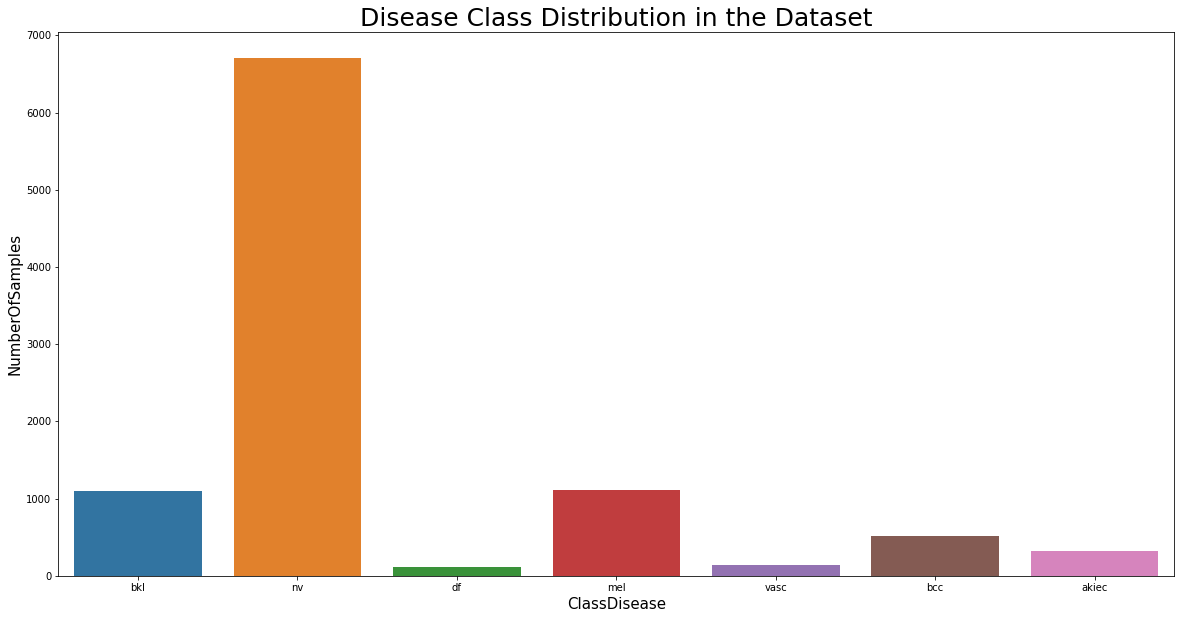

In [6]:
bar, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = 'dx', data = metadata)
plt.title('Disease Class Distribution in the Dataset', size=25)
plt.xlabel('ClassDisease', size=15)
plt.ylabel('NumberOfSamples', size=15)
plt.show()

## **STEP 3.2: DISEASE LOCALIZATION**

In order for better undestanding the Dataset, we can also view the different typologies of **Disease Localization**. This will not be a very important feature for us, but we have a look at it.

We can see that the face, back and lower extremity, are the most predominant samples in the Dataset.

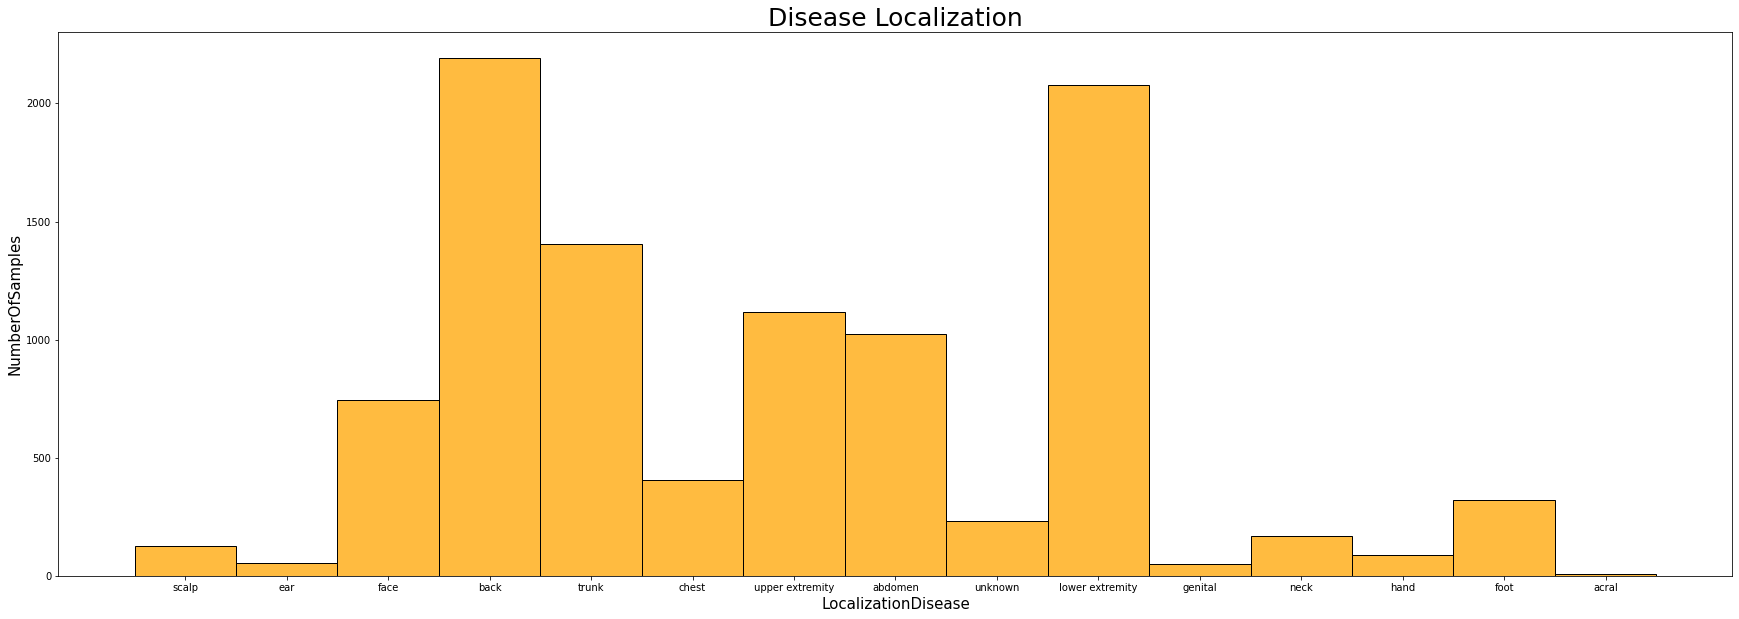

In [7]:
bar, ax = plt.subplots(figsize=(30, 10))
sns.histplot(metadata['localization'], color='orange')
plt.title('Disease Localization', size=25)
plt.xlabel('LocalizationDisease', size=15)
plt.ylabel('NumberOfSamples', size=15)
plt.show()

## **STEP 3.3: PATIENTS AGE**

In order for better undestanding the Dataset, we can also view the **Patients Age Distribution**. This will not be a very important feature for us, but we have a look at it.

We can observe a **Left-Skewed Gaussian Distribution**(i.e., it presents Negative Skewness).

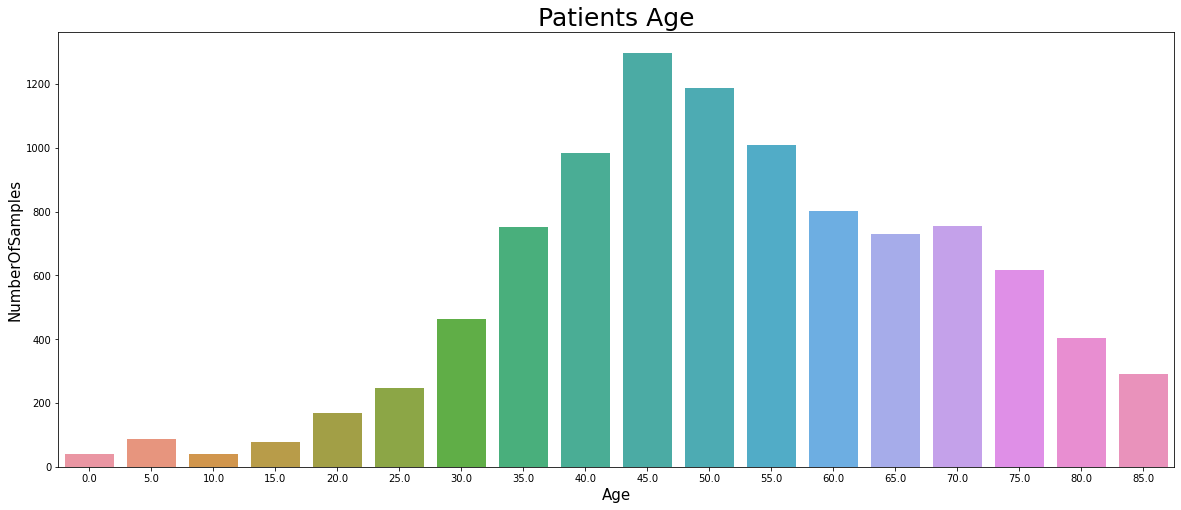

In [8]:
disease_location = metadata['age'].value_counts()
plt.figure(figsize=(20, 8))
sns.countplot(x='age', data=metadata)
plt.title('Patients Age', size=25)
plt.xlabel('Age', size=15)
plt.ylabel('NumberOfSamples', size=15)
plt.show()

The plot above clearly indicates the are group that is mostly affected by skin cancer, which is that of ages between 40 and 48.

## **STEP 3.4: SKIN-LESION VERIFICATION**

In order for better undestanding the Dataset, we can also view the **Skin Lesion Verification** typology. This will not be a very important feature for us, but we have a look at it.

We can observe also here, a very unbalanced histogram, that is towards the histologycal and follow-up methodology.


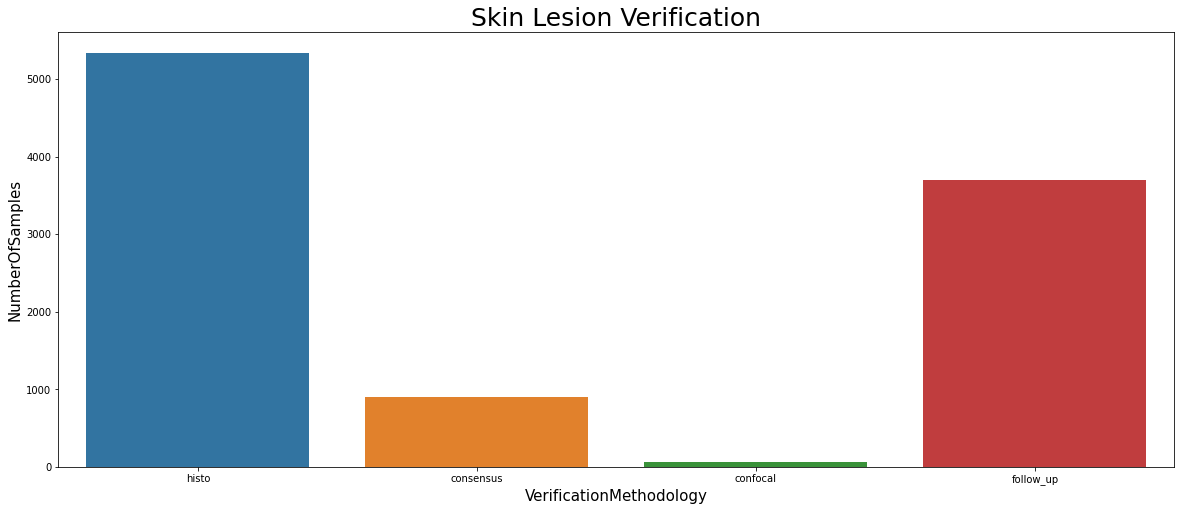

In [9]:
disease_location = metadata['dx_type'].value_counts()
plt.figure(figsize=(20, 8))
sns.countplot(x='dx_type', data=metadata)
plt.title('Skin Lesion Verification', size=25)
plt.xlabel('VerificationMethodology', size=15)
plt.ylabel('NumberOfSamples', size=15)
plt.show()

By fat the most frequent locations of the body that skin cancer appeared was the back and the lower extermity, followed by the trunk, upper extermity and the abdomen.

## **STEP 3.5: PATIENTS GENDER**

In order for better undestanding the Dataset, we can also view the **Skin Lesion Verification** typology. This will not be a very important feature for us, but we have a look at it.

We can observe here, instead, a very balanced histogram, that almost resembles the **Uniform Distribution**.


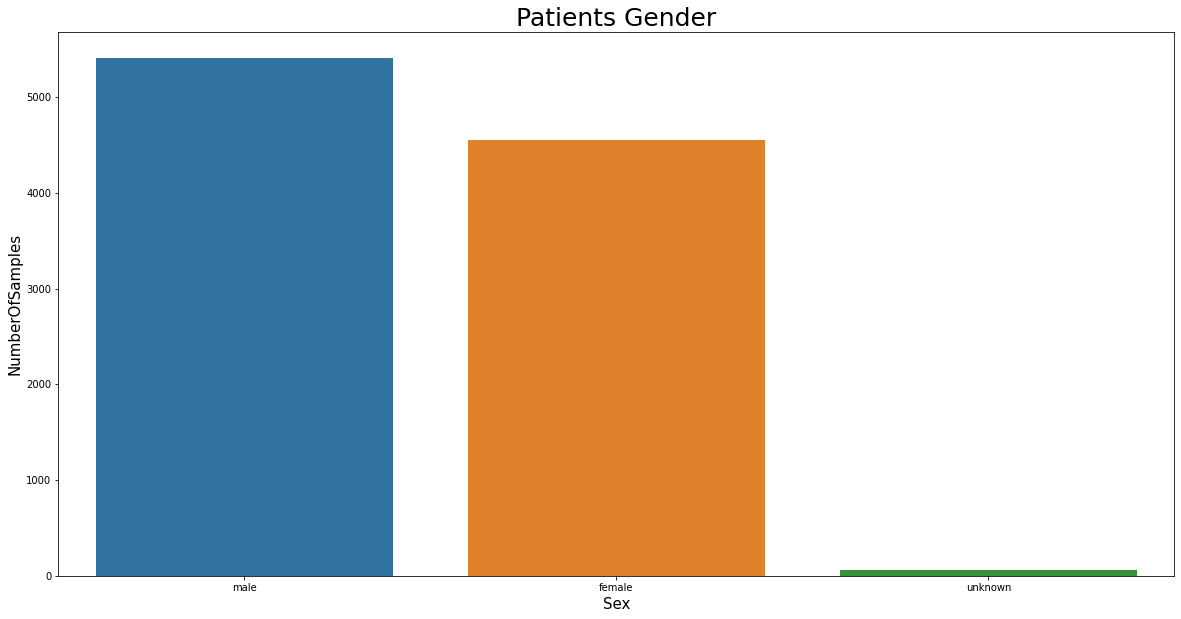

In [10]:
bar, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = 'sex', data = metadata)
plt.title('Patients Gender', size=25)
plt.xlabel('Sex', size=15)
plt.ylabel('NumberOfSamples', size=15)
plt.show()

In terms of the gender of patients that are most affected I have found that males are slightly more affected.

# **STEP 4: DATASET TRAIN-TEST SPLIT**

Once we have done with the Dataset Deepening, we are ready to build our models.





## **STEP 4.1: DATASET CLASSES DECLARATION**

First of all, let's define the **Classes** that we have previously mentioned, in such a way to have them saved as a Dictionary. This will be useful for the last **Multiclassification**.



In [11]:
# Creation of a Dictionary for sotring the classes of Disease
classes={ 0:('akiec', 'Actinic Keratoses and Intraepithelial Carcinomae'), 
          1:('bcc' , 'basal cell carcinoma'), 
          2:('bkl', 'benign keratosis-like lesions'),
          3:('df', 'dermatofibroma'),
          4:('nv', ' melanocytic nevi'),
          5:('vasc', ' pyogenic granulomas and hemorrhage'),
          6:('mel', 'melanoma')}

# Declaration of the 80-20 Split.
fractions = np.array([0.8,0.2])

## **STEP 4.2: TRAIN-TEST SPLIT**

In order to do this, we proceed to **Split** the **Dataset** in two parts **Training** and **Testing** parts, following the **80-20% Rule**.

This resulting split, will divide the Dataset in two parts, the first (Training), will have **8012** elements, the second one (Testing), will have **2003** elements.

In [12]:
# Generating a sample random row or column from the function caller dataFrame. (Shortcut for copying it).
dataset1 = dataset.sample(frac=1)
len_dataset1 = len(dataset1)

# Actual Train-Test Split.
train_set, test_set = np.array_split(dataset1, (fractions[:-1].cumsum() * len_dataset1).astype(int))
len_train_set, len_test_set = len(train_set), len(test_set) 

# Data-Label Split.
y_train = train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])
columns=list(x_train)

# **STEP 5: DATASET BALANCING**

It's now time to face the problem we have found in the previous section: **Class Imbalance**. This problem, usually reflects an unequal distribution of classes within a dataset. For example, in our Dataset, most of the samples are from one class(65% of all the samples) and a very few classes are from the others (35% of all samples). 

This leaves us with something like about 11:1 ratio between the **nv** class and the others. 

This problem, can be solved in two different manner:
- **UnderSampling:** It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class. 
- **OverSampling:** This second resampling technique is a little more complicated than undersampling. It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class. There are a number of methods used to oversample a dataset for a typical classification problem. 

For facing this problem, we opted for the second technique, **OverSampling**, using the **ResampleFromTheDataset** strategy. This will simply resample the "remaining" samples, up until it has not filled the Gap.

From the **result** of the plot, we can observe that we have now reached a **Uniform Distribution** in the Dataset among all the classes.

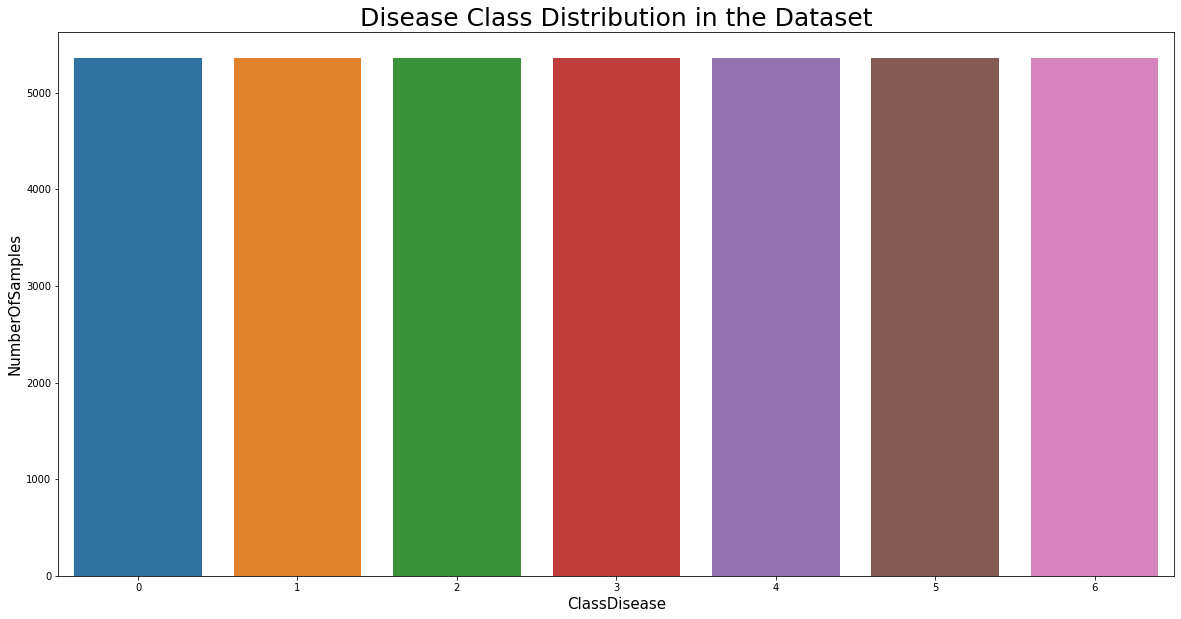

In [13]:
# Declaration of the RandomOverSampler and fitting it.
# oversample = RandomOverSampler()
# x_train,y_train  = oversample.fit_resample(x_train,y_train)
# sns.countplot(y_train)

sm = SMOTE(random_state = 42)
x_train, y_train = sm.fit_resample(x_train, y_train)

# Replotting the dataset, after the SMOTE sampling.
bar, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = y_train)
plt.title('Disease Class Distribution in the Dataset', size=25)
plt.xlabel('ClassDisease', size=15)
plt.ylabel('NumberOfSamples', size=15)
plt.show()

# **STEP 6: IMAGE VISUALIZATION**

We can now proceed to have a more in depth **look** at the actual **Image**. We can therefore random sample some image, reshape it, and visualize it.

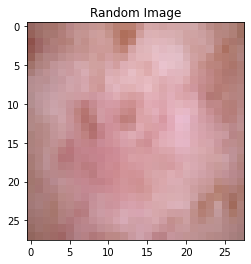

In [14]:
# Take one number from 0 to 10000.
n = random.randint(0,10000)

# Reshape it.
x_train_4d=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

# Plotting it.
plt.title("Random Image")
plt.imshow(x_train_4d[n].reshape(28,28,3))
plt.show()


# **STEP 7: CNN MODEL**

Our first **Model** for solving our **SkinMe Project** is to use a **CNN**(Convolutional Neural Network) that will solve our issue to determine what typology of skin lesion we have.


## **STEP 7.1: MODEL BUILDING**

In order to **Build the Model**, we will make use of the following schema:
- Conv2D
- MaxPool2D
- BatchNormalization
- Conv2D
- Conv2D
- MaxPool2D
- BatchNormalization
- Conv2D
- Flatten
- ...

Note that in the **Dense Layers** we have made use of a very recent **Activation Function**, **MISH**, that has surclassed **ReLu** in our Project with way better results. The **Last Layer** is, of course, a **Softmax** that will return us the class with the highest probability. At the end, we see that we are working with about **500K Parameters**.

Once, we have set the CNN, we load the wieghts, that will be used in such a way to not restart from zero at each time we restart the training. We can then compute the Loss using the **Sparse Categorical Cross Entropy**, and the **Adam Optimizer**.



In [15]:
# Definition of the MISH function.
def mish(inputs):
    x = tf.nn.softplus(inputs)
    x = tf.nn.tanh(x)
    x = tf.multiply(x, inputs)
    return x

# Let's create the Model.
CNN_Model = Sequential()
CNN_Model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
CNN_Model.add(MaxPool2D(pool_size = (2,2)))
CNN_Model.add(tf.keras.layers.BatchNormalization())
CNN_Model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
CNN_Model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
CNN_Model.add(MaxPool2D(pool_size = (2,2)))
CNN_Model.add(tf.keras.layers.BatchNormalization())
CNN_Model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
CNN_Model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
CNN_Model.add(Flatten())
CNN_Model.add(tf.keras.layers.Dropout(0.2))
CNN_Model.add(Dense(256,activation=mish))
CNN_Model.add(tf.keras.layers.BatchNormalization())
CNN_Model.add(tf.keras.layers.Dropout(0.2))
CNN_Model.add(Dense(128,activation=mish))
CNN_Model.add(tf.keras.layers.BatchNormalization())
CNN_Model.add(Dense(64,activation=mish))
CNN_Model.add(tf.keras.layers.BatchNormalization())
CNN_Model.add(tf.keras.layers.Dropout(0.2))
CNN_Model.add(Dense(32,activation=mish))
CNN_Model.add(tf.keras.layers.BatchNormalization())
CNN_Model.add(Dense(7,activation='softmax'))

# Let's print out the result of the CNN.
CNN_Model.summary()

# Take the weights from the pre-trained versions.
callback = tf.keras.callbacks.ModelCheckpoint(filepath='drive/MyDrive/SkinMeProject/dataset/hmnist_28_28_RGB.csv/CNN_weights.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Let's Compile the CNN_Model by applying the SparseCategoricalCrossEntropy and Adam Optimizer.
CNN_Model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.001), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

## **7.2 - MODEL FITTING**

Once we have built the model, we can procede to **fit** the **Model** and start therefore the actual Training. We can proceed with a batch-size of 128, and 100 epochs, using also the previous weights.

Once we have done this, also load the weights to the CNN_weights file.

In [16]:
start_time = datetime.now()
history = CNN_Model.fit(x_train_4d, y_train, validation_split=0.2, batch_size = 128, epochs = 100, shuffle=True, callbacks=[callback])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

CNN_Model.load_weights('drive/MyDrive/SkinMeProject/dataset/CNN_weights.h5')

Epoch 1/100
235/235 [==============================] - ETA: 0s - loss: 0.8270 - accuracy: 0.7155

235/235 [==============================] - 13s 12ms/step - loss: 0.8270 - accuracy: 0.7155 - val_loss: 1.9930 - val_accuracy: 0.2864
Epoch 2/100
232/235 [============================>.] - ETA: 0s - loss: 0.3407 - accuracy: 0.8843

235/235 [==============================] - 2s 10ms/step - loss: 0.3407 - accuracy: 0.8842 - val_loss: 1.2328 - val_accuracy: 0.3874
Epoch 3/100
234/235 [============================>.] - ETA: 0s - loss: 0.2327 - accuracy: 0.9170

235/235 [==============================] - 3s 15ms/step - loss: 0.2325 - accuracy: 0.9170 - val_loss: 1.1612 - val_accuracy: 0.4008
Epoch 4/100
230/235 [============================>.] - ETA: 0s - loss: 0.1817 - accuracy: 0.9352

235/235 [==============================] - 3s 12ms/step - loss: 0.1818 - accuracy: 0.9352 - val_loss: 1.6422 - val_accuracy: 0.4542
Epoch 5/100
229/235 [============================>.] - ETA: 0s - loss: 0.1585 - accuracy: 0.9447

235/235 [==============================] - 2s 9ms/step - loss: 0.1579 - accuracy: 0.9450 - val_loss: 1.1492 - val_accuracy: 0.5614
Epoch 6/100
233/235 [============================>.] - ETA: 0s - loss: 0.1416 - accuracy: 0.9499

235/235 [==============================] - 2s 9ms/step - loss: 0.1415 - accuracy: 0.9499 - val_loss: 0.8495 - val_accuracy: 0.6134
Epoch 7/100
229/235 [============================>.] - ETA: 0s - loss: 0.1125 - accuracy: 0.9591

235/235 [==============================] - 2s 9ms/step - loss: 0.1122 - accuracy: 0.9591 - val_loss: 1.2000 - val_accuracy: 0.5095
Epoch 8/100
233/235 [============================>.] - ETA: 0s - loss: 0.1122 - accuracy: 0.9597

235/235 [==============================] - 2s 9ms/step - loss: 0.1118 - accuracy: 0.9598 - val_loss: 1.4409 - val_accuracy: 0.4361
Epoch 9/100
234/235 [============================>.] - ETA: 0s - loss: 0.0832 - accuracy: 0.9693

235/235 [==============================] - 2s 9ms/step - loss: 0.0832 - accuracy: 0.9692 - val_loss: 1.3856 - val_accuracy: 0.5245
Epoch 10/100
229/235 [============================>.] - ETA: 0s - loss: 0.0843 - accuracy: 0.9692

235/235 [==============================] - 2s 9ms/step - loss: 0.0843 - accuracy: 0.9693 - val_loss: 1.6139 - val_accuracy: 0.4619
Epoch 11/100
231/235 [============================>.] - ETA: 0s - loss: 0.0821 - accuracy: 0.9707

235/235 [==============================] - 2s 9ms/step - loss: 0.0822 - accuracy: 0.9707 - val_loss: 0.7151 - val_accuracy: 0.6852
Epoch 12/100
233/235 [============================>.] - ETA: 0s - loss: 0.0676 - accuracy: 0.9761

235/235 [==============================] - 2s 9ms/step - loss: 0.0676 - accuracy: 0.9761 - val_loss: 1.2126 - val_accuracy: 0.5936
Epoch 13/100
230/235 [============================>.] - ETA: 0s - loss: 0.0641 - accuracy: 0.9785

235/235 [==============================] - 2s 9ms/step - loss: 0.0644 - accuracy: 0.9784 - val_loss: 1.0108 - val_accuracy: 0.6035
Epoch 14/100
233/235 [============================>.] - ETA: 0s - loss: 0.0703 - accuracy: 0.9748

235/235 [==============================] - 2s 9ms/step - loss: 0.0703 - accuracy: 0.9748 - val_loss: 1.8211 - val_accuracy: 0.4681
Epoch 15/100
233/235 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.9798

235/235 [==============================] - 2s 9ms/step - loss: 0.0571 - accuracy: 0.9798 - val_loss: 0.7291 - val_accuracy: 0.7652
Epoch 16/100
232/235 [============================>.] - ETA: 0s - loss: 0.0437 - accuracy: 0.9850

235/235 [==============================] - 2s 10ms/step - loss: 0.0435 - accuracy: 0.9851 - val_loss: 0.9162 - val_accuracy: 0.7089
Epoch 17/100
231/235 [============================>.] - ETA: 0s - loss: 0.0438 - accuracy: 0.9846

235/235 [==============================] - 2s 10ms/step - loss: 0.0437 - accuracy: 0.9847 - val_loss: 0.6960 - val_accuracy: 0.7975
Epoch 18/100
234/235 [============================>.] - ETA: 0s - loss: 0.0462 - accuracy: 0.9843

235/235 [==============================] - 4s 16ms/step - loss: 0.0462 - accuracy: 0.9843 - val_loss: 0.6694 - val_accuracy: 0.7814
Epoch 19/100
233/235 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9871

235/235 [==============================] - 3s 13ms/step - loss: 0.0383 - accuracy: 0.9870 - val_loss: 0.6141 - val_accuracy: 0.7985
Epoch 20/100
232/235 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9884

235/235 [==============================] - 2s 10ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 1.2186 - val_accuracy: 0.6936
Epoch 21/100
232/235 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9877

235/235 [==============================] - 2s 10ms/step - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.7012 - val_accuracy: 0.7682
Epoch 22/100
229/235 [============================>.] - ETA: 0s - loss: 0.0310 - accuracy: 0.9893

235/235 [==============================] - 2s 9ms/step - loss: 0.0315 - accuracy: 0.9891 - val_loss: 1.9599 - val_accuracy: 0.5456
Epoch 23/100
230/235 [============================>.] - ETA: 0s - loss: 0.0322 - accuracy: 0.9891

235/235 [==============================] - 2s 9ms/step - loss: 0.0319 - accuracy: 0.9891 - val_loss: 1.4577 - val_accuracy: 0.6372
Epoch 24/100
232/235 [============================>.] - ETA: 0s - loss: 0.0343 - accuracy: 0.9883

235/235 [==============================] - 2s 9ms/step - loss: 0.0343 - accuracy: 0.9882 - val_loss: 1.3729 - val_accuracy: 0.6724
Epoch 25/100
235/235 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9920

235/235 [==============================] - 2s 10ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 1.5574 - val_accuracy: 0.6032
Epoch 26/100
233/235 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9918

235/235 [==============================] - 2s 9ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.5907 - val_accuracy: 0.8537
Epoch 27/100
235/235 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9893

235/235 [==============================] - 2s 10ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.6949 - val_accuracy: 0.7753
Epoch 28/100
234/235 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9929

235/235 [==============================] - 2s 10ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.6957 - val_accuracy: 0.8033
Epoch 29/100
234/235 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9933

235/235 [==============================] - 2s 9ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.4429 - val_accuracy: 0.8745
Epoch 30/100
232/235 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9951

235/235 [==============================] - 2s 9ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.3778 - val_accuracy: 0.8910
Epoch 31/100
233/235 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9910

235/235 [==============================] - 2s 10ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.9983 - val_accuracy: 0.7602
Epoch 32/100
234/235 [============================>.] - ETA: 0s - loss: 0.0243 - accuracy: 0.9924

235/235 [==============================] - 2s 9ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.6917 - val_accuracy: 0.8277
Epoch 33/100
233/235 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9934

235/235 [==============================] - 2s 9ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.9046 - val_accuracy: 0.7846
Epoch 34/100
230/235 [============================>.] - ETA: 0s - loss: 0.0229 - accuracy: 0.9930

235/235 [==============================] - 2s 9ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 1.2868 - val_accuracy: 0.6889
Epoch 35/100
235/235 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9946

235/235 [==============================] - 2s 9ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.9483 - val_accuracy: 0.7804
Epoch 36/100
235/235 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9936

235/235 [==============================] - 2s 9ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.4765 - val_accuracy: 0.8635
Epoch 37/100
230/235 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9938

235/235 [==============================] - 2s 9ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 1.1474 - val_accuracy: 0.7236
Epoch 38/100
233/235 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9950

235/235 [==============================] - 2s 9ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.4147 - val_accuracy: 0.8942
Epoch 39/100
230/235 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9965

235/235 [==============================] - 2s 9ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 1.6646 - val_accuracy: 0.6780
Epoch 40/100
234/235 [============================>.] - ETA: 0s - loss: 0.0236 - accuracy: 0.9929

235/235 [==============================] - 2s 9ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.8276 - val_accuracy: 0.7860
Epoch 41/100
235/235 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9930

235/235 [==============================] - 2s 9ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.7987 - val_accuracy: 0.8027
Epoch 42/100
229/235 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9972

235/235 [==============================] - 2s 9ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.6194 - val_accuracy: 0.8577
Epoch 43/100
234/235 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9947

235/235 [==============================] - 2s 9ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.4885 - val_accuracy: 0.8722
Epoch 44/100
232/235 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9960

235/235 [==============================] - 2s 9ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.4150 - val_accuracy: 0.8930
Epoch 45/100
234/235 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9947

235/235 [==============================] - 2s 9ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.7335 - val_accuracy: 0.8225
Epoch 46/100
235/235 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9971

235/235 [==============================] - 2s 9ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.7770 - val_accuracy: 0.8177
Epoch 47/100
231/235 [============================>.] - ETA: 0s - loss: 0.0232 - accuracy: 0.9927

235/235 [==============================] - 2s 9ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.6448 - val_accuracy: 0.8361
Epoch 48/100
234/235 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9946

235/235 [==============================] - 2s 9ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.3842 - val_accuracy: 0.9023
Epoch 49/100
229/235 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9970

235/235 [==============================] - 2s 9ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.5846 - val_accuracy: 0.8543
Epoch 50/100
230/235 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9972

235/235 [==============================] - 2s 10ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.8089 - val_accuracy: 0.8198
Epoch 51/100
234/235 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9948

235/235 [==============================] - 2s 10ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.5881 - val_accuracy: 0.8490
Epoch 52/100
232/235 [============================>.] - ETA: 0s - loss: 0.0155 - accuracy: 0.9951

235/235 [==============================] - 2s 9ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.3481 - val_accuracy: 0.9106
Epoch 53/100
229/235 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9960

235/235 [==============================] - 2s 9ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.6722 - val_accuracy: 0.8530
Epoch 54/100
234/235 [============================>.] - ETA: 0s - loss: 0.0108 - accuracy: 0.9967

235/235 [==============================] - 2s 10ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.8029 - val_accuracy: 0.8155
Epoch 55/100
233/235 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9968

235/235 [==============================] - 2s 9ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 1.2696 - val_accuracy: 0.7514
Epoch 56/100
234/235 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9961

235/235 [==============================] - 2s 9ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.4250 - val_accuracy: 0.8915
Epoch 57/100
229/235 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9973

235/235 [==============================] - 2s 10ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.5728 - val_accuracy: 0.8635
Epoch 58/100
230/235 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9955

235/235 [==============================] - 2s 9ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.6785 - val_accuracy: 0.8355
Epoch 59/100
233/235 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9972

235/235 [==============================] - 2s 9ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.6296 - val_accuracy: 0.8442
Epoch 60/100
232/235 [============================>.] - ETA: 0s - loss: 0.0106 - accuracy: 0.9965

235/235 [==============================] - 2s 10ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.5243 - val_accuracy: 0.8755
Epoch 61/100
230/235 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9962

235/235 [==============================] - 2s 9ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 1.5605 - val_accuracy: 0.6404
Epoch 62/100
232/235 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9964

235/235 [==============================] - 2s 9ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.8325 - val_accuracy: 0.7764
Epoch 63/100
229/235 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9948

235/235 [==============================] - 2s 9ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.9176 - val_accuracy: 0.8145
Epoch 64/100
230/235 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9974

235/235 [==============================] - 2s 9ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.4623 - val_accuracy: 0.8930
Epoch 65/100
233/235 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9974

235/235 [==============================] - 2s 9ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.9329 - val_accuracy: 0.8019
Epoch 66/100
235/235 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9972

235/235 [==============================] - 2s 9ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.2682 - val_accuracy: 0.9291
Epoch 67/100
235/235 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9975

235/235 [==============================] - 2s 9ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.5657 - val_accuracy: 0.8575
Epoch 68/100
234/235 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9978

235/235 [==============================] - 2s 10ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.9276 - val_accuracy: 0.8067
Epoch 69/100
234/235 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9967

235/235 [==============================] - 2s 9ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.5615 - val_accuracy: 0.8633
Epoch 70/100
232/235 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9969

235/235 [==============================] - 2s 9ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.7734 - val_accuracy: 0.8434
Epoch 71/100
230/235 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9981

235/235 [==============================] - 2s 10ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 1.4957 - val_accuracy: 0.7170
Epoch 72/100
232/235 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9970

235/235 [==============================] - 2s 10ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.7643 - val_accuracy: 0.8429
Epoch 73/100
231/235 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9969

235/235 [==============================] - 2s 9ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.5969 - val_accuracy: 0.8494
Epoch 74/100
232/235 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9977

235/235 [==============================] - 2s 9ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.5910 - val_accuracy: 0.8677
Epoch 75/100
232/235 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9977

235/235 [==============================] - 2s 9ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.3270 - val_accuracy: 0.9218
Epoch 76/100
233/235 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9958

235/235 [==============================] - 2s 10ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 1.2695 - val_accuracy: 0.7328
Epoch 77/100
235/235 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9971

235/235 [==============================] - 2s 10ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.4046 - val_accuracy: 0.9046
Epoch 78/100
230/235 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9990

235/235 [==============================] - 2s 10ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.6621 - val_accuracy: 0.8595
Epoch 79/100
233/235 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9978

235/235 [==============================] - 2s 9ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.2575 - val_accuracy: 0.9374
Epoch 80/100
234/235 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9971

235/235 [==============================] - 2s 10ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 1.0126 - val_accuracy: 0.7813
Epoch 81/100
233/235 [============================>.] - ETA: 0s - loss: 0.0107 - accuracy: 0.9963

235/235 [==============================] - 2s 9ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.4777 - val_accuracy: 0.8910
Epoch 82/100
231/235 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9974

235/235 [==============================] - 2s 10ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.6831 - val_accuracy: 0.8531
Epoch 83/100
232/235 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9972

235/235 [==============================] - 2s 9ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.6993 - val_accuracy: 0.8310
Epoch 84/100
231/235 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9981

235/235 [==============================] - 2s 10ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.4391 - val_accuracy: 0.8999
Epoch 85/100
234/235 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9978

235/235 [==============================] - 2s 9ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.4898 - val_accuracy: 0.8963
Epoch 86/100
233/235 [============================>.] - ETA: 0s - loss: 0.0106 - accuracy: 0.9963

235/235 [==============================] - 2s 9ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 1.8976 - val_accuracy: 0.6319
Epoch 87/100
231/235 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9974

235/235 [==============================] - 2s 9ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.3381 - val_accuracy: 0.9138
Epoch 88/100
235/235 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9985

235/235 [==============================] - 2s 9ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.4036 - val_accuracy: 0.9060
Epoch 89/100
233/235 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991

235/235 [==============================] - 2s 10ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.3871 - val_accuracy: 0.9119
Epoch 90/100
230/235 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 0.9988

235/235 [==============================] - 2s 9ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.7683 - val_accuracy: 0.8417
Epoch 91/100
234/235 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9973

235/235 [==============================] - 2s 9ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.2890 - val_accuracy: 0.9278
Epoch 92/100
232/235 [============================>.] - ETA: 0s - loss: 0.0113 - accuracy: 0.9965

235/235 [==============================] - 2s 9ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 1.5012 - val_accuracy: 0.7020
Epoch 93/100
229/235 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9980

235/235 [==============================] - 2s 9ms/step - loss: 0.0056 - accuracy: 0.9979 - val_loss: 1.2954 - val_accuracy: 0.7753
Epoch 94/100
231/235 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9973

235/235 [==============================] - 2s 9ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.8157 - val_accuracy: 0.8206
Epoch 95/100
231/235 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9977

235/235 [==============================] - 2s 9ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.3162 - val_accuracy: 0.9270
Epoch 96/100
233/235 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9979

235/235 [==============================] - 2s 9ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.7309 - val_accuracy: 0.8483
Epoch 97/100
235/235 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9994

235/235 [==============================] - 2s 9ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.4056 - val_accuracy: 0.9120
Epoch 98/100
235/235 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9982

235/235 [==============================] - 2s 10ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.6054 - val_accuracy: 0.8698
Epoch 99/100
232/235 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9964

235/235 [==============================] - 2s 9ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.3315 - val_accuracy: 0.9156
Epoch 100/100
229/235 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9969

235/235 [==============================] - 2s 10ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.4679 - val_accuracy: 0.8986
Duration: 0:03:57.155083


## **7.3 - MODEL EVALUATION**

We can now see the **Model Evaluation**, i.e., how much the model has gone well. First of all, we observe the **Model Accuracy**. This will print the **Accuracy VS Epochs**. We will print out the plot for Accuracy and Validation.

As a second step of the Model Evaluation, we have to see the **Model Loss**. We therefore print out the plot for **Loss VS Epochs**.

As third step, we will have to compute the predictions of the x-test and compute the Confusion Matrix onto it.

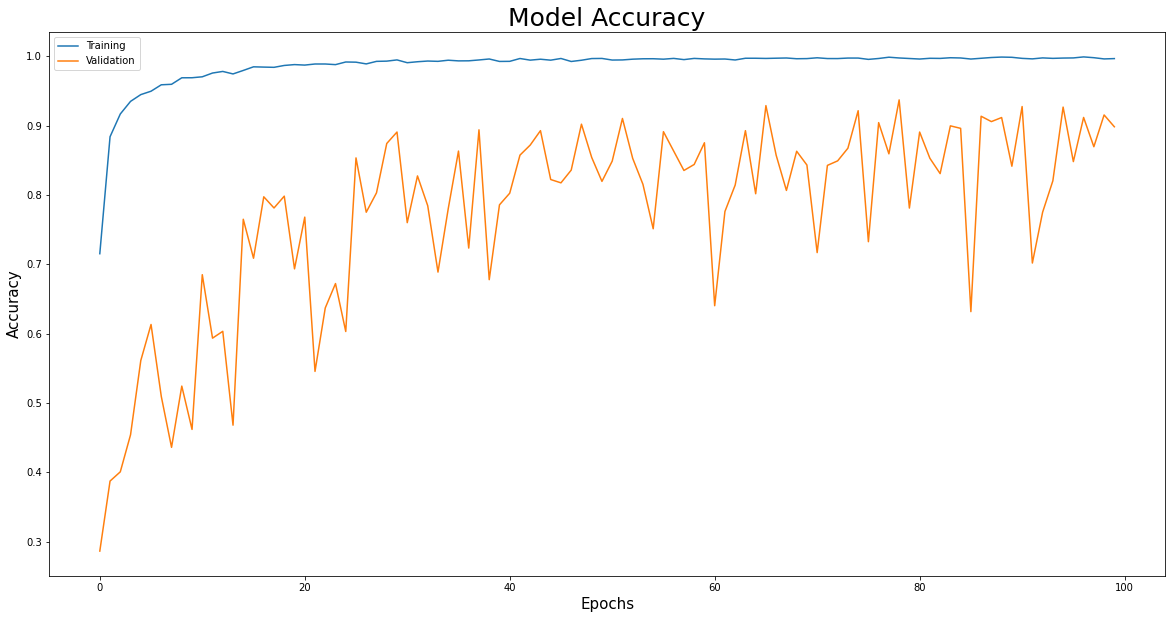

In [17]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.legend(['Training', 'Validation'], loc='bottom right')
plt.show()

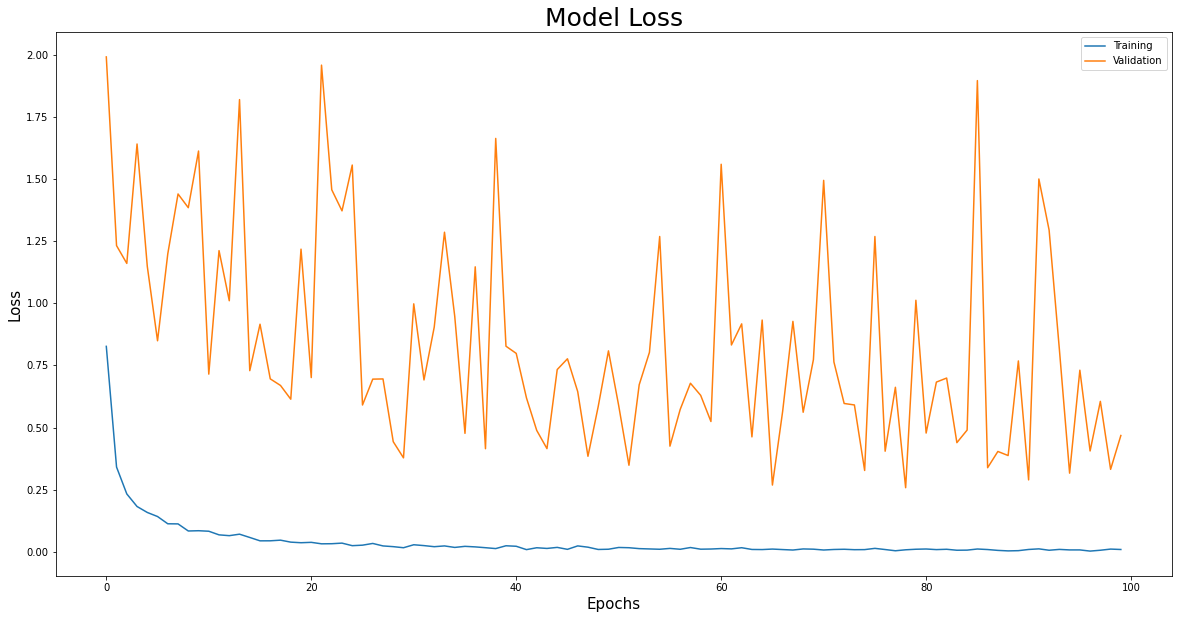

In [18]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25)
plt.ylabel('Loss', size=15)
plt.xlabel('Epochs', size=15)
plt.legend(['Training', 'Validation'], loc='bottom right')

63/63 - 1s - loss: 0.2106 - accuracy: 0.9521 - 593ms/epoch - 9ms/step
63/63 [==============================] - 0s 3ms/step


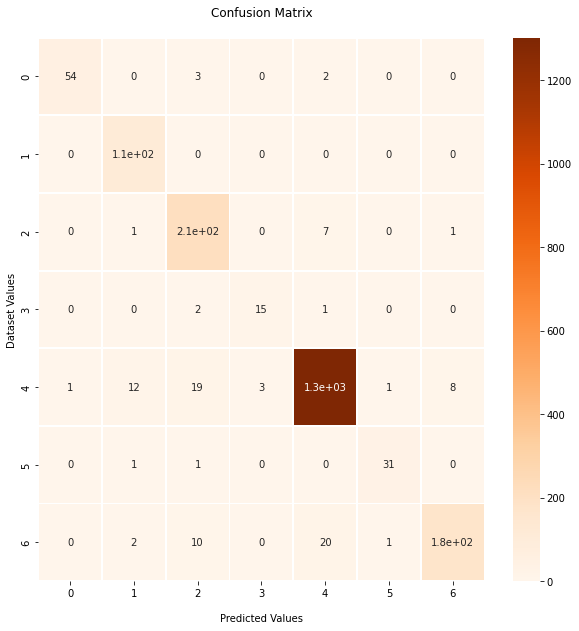

In [19]:
# Compute the Loss, taking the x-test.
x_test_4d=np.array(x_test).reshape(-1,28,28,3)
loss, acc = CNN_Model.evaluate(x_test_4d, y_test, verbose=2)

# Making the Prediction of the x-test using our CNN-Model.
y_pred = CNN_Model.predict(x_test_4d)
y_pred = np.argmax(y_pred, axis=1)

#Computing the Confusion Matrix.
conf_mat = confusion_matrix(y_test, y_pred)
labels_numbers = ['0','1','2','3','4','5','6']
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(conf_mat, annot=True, cmap='Oranges', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Dataset Values');
ax.xaxis.set_ticklabels(labels_numbers)
ax.yaxis.set_ticklabels(labels_numbers)
plt.show()

## **STEP 7.4: TESTING THE EXAMPLE**

We can now test with our examples the Model. We can see that, by taing some photos from Internet, it will succeed in every prevision!


In [39]:
# Get the Image from the folder.
test=PIL.Image.open('drive/MyDrive/SkinMeProject/test_imgs/federica.jpg')

# Resize the image, and reshape it.
test=test.resize((28,28))
test_img=x_test_4d[1]
test_img=np.array(test).reshape(-1,28,28,3)

# Compute the result-prediction of the gicen image.
test_result=CNN_Model.predict(test_img)
test_result=test_result.tolist()
max_prob=max(test_result[0])

# Take the index of the result in such a way to map it to the result.
test_index=test_result[0].index(max_prob)
print(classes[test_index])

1/1 [==============================] - 0s 16ms/step
('mel', 'melanoma')


# **STEP 8: LSTM MODEL**

As adversary to the first model we have built, we are going to build an LSTM that will be discovering Diseases in the same way, but using the Long Short Term Memory. 

## **STEP 8.1: MODEL BUILDING**

In order to **Build LSTM Model**, we will first of all reshape the Train and Test Set in 3d. After this, we will use the **Normalization** trick, in such a way to have the data to be cnetered in the mean and divided by the standard deviation. 

After this, we proceed into creating a **One-Hot-Encoding**. Once finished, we can finally Build our **LSTM Network**. Also here, we have that there is the usage of the **Dropout** trick, with the aim to regularize for reducing overfitting. It is an efficient way of performing model averaging, by randomly "dropping out", or omitting, units (both hidden and visible) during the training process of a neural network.

In [22]:
# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for LSTM network
nb_lstm = 64
nb_time_steps = 28
dim_input_vector = 28

# Reshaping Train and Test set.
x_train_3d = np.array(x_train, dtype=np.uint8).reshape(-1,28,84)
x_test_3d = np.array(x_test, dtype=np.uint8).reshape(-1,28,84)

# Normalization
x_train_3d = (x_train_3d - np.mean(x_train_3d)) / np.std(x_train_3d)
x_test_3d = (x_test_3d - np.mean(x_test_3d)) / np.std(x_test_3d)

# Transform the Data in One-Hot-Encoding
y_train_3d = keras.utils.np_utils.to_categorical(y_train, 7)
y_test_3d = keras.utils.np_utils.to_categorical(y_test, 7)

# Building LSTM network
start = time.time()
LSTM_model = Sequential()
LSTM_model.add(LSTM(nb_lstm, input_shape=(nb_time_steps, 84), return_sequences=True))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(nb_lstm, return_sequences=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(7, activation='softmax'))
LSTM_model.summary()

#Start downloading the weights, if any, of pre-trained sessions.
callback = tf.keras.callbacks.ModelCheckpoint(filepath='drive/MyDrive/SkinMeProject/dataset/LSTM_weights.h5', monitor='val_acc', mode='max', verbose=1)

# Complie the Model using the same loss function and optimizer of before.
LSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LSTM_model.load_weights('drive/MyDrive/SkinMeProject/dataset/LSTM_weights.h5')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 64)            38144     
                                                                 
 dropout_3 (Dropout)         (None, 28, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 71,623
Trainable params: 71,623
Non-trainable params: 0
_________________________________________________________________


## **STEP 8.2: MODEL FITTING**

We can now **Fit the Model**, i.e., train it over the 100 epochs.

In [23]:
start = time.time()
# Fitting the model
history = LSTM_model.fit(x_train_3d, y_train_3d, epochs=100, batch_size=128, callbacks=[callback], validation_split = 0.2)
stop = time.time()

Epoch 1/100
232/235 [============================>.] - ETA: 0s - loss: 0.2494 - accuracy: 0.9405
Epoch 1: saving model to drive/MyDrive/SkinMeProject/dataset/LSTM_weights.h5
235/235 [==============================] - 9s 12ms/step - loss: 0.2481 - accuracy: 0.9409 - val_loss: 0.7510 - val_accuracy: 0.7921
Epoch 2/100
234/235 [============================>.] - ETA: 0s - loss: 0.1203 - accuracy: 0.9658
Epoch 2: saving model to drive/MyDrive/SkinMeProject/dataset/LSTM_weights.h5
235/235 [==============================] - 2s 9ms/step - loss: 0.1203 - accuracy: 0.9658 - val_loss: 0.7782 - val_accuracy: 0.7781
Epoch 3/100
233/235 [============================>.] - ETA: 0s - loss: 0.0956 - accuracy: 0.9712
Epoch 3: saving model to drive/MyDrive/SkinMeProject/dataset/LSTM_weights.h5
235/235 [==============================] - 2s 9ms/step - loss: 0.0954 - accuracy: 0.9713 - val_loss: 0.5052 - val_accuracy: 0.8487
Epoch 4/100
233/235 [============================>.] - ETA: 0s - loss: 0.0742 - accu

## **8.4 - MODEL EVALUATION**

We can now see the **Model Evaluation**, i.e., how much the model has gone well. First of all, we observe the **Model Accuracy**. This will print the **Accuracy VS Epochs**. We will print out the plot for Accuracy and Validation.

As a second step of the Model Evaluation, we have to see the **Model Loss**. We therefore print out the plot for **Loss VS Epochs**.

As third step, we will have to compute the predictions of the x-test and compute the Confusion Matrix onto it.

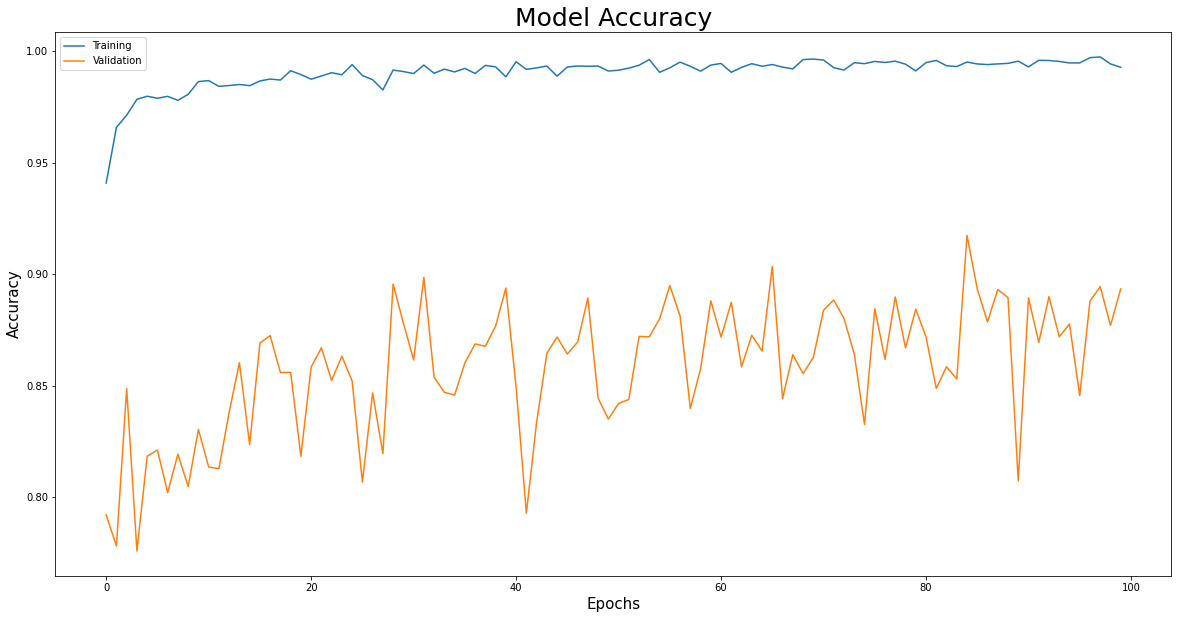

In [24]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.legend(['Training', 'Validation'], loc='bottom right')
plt.show()

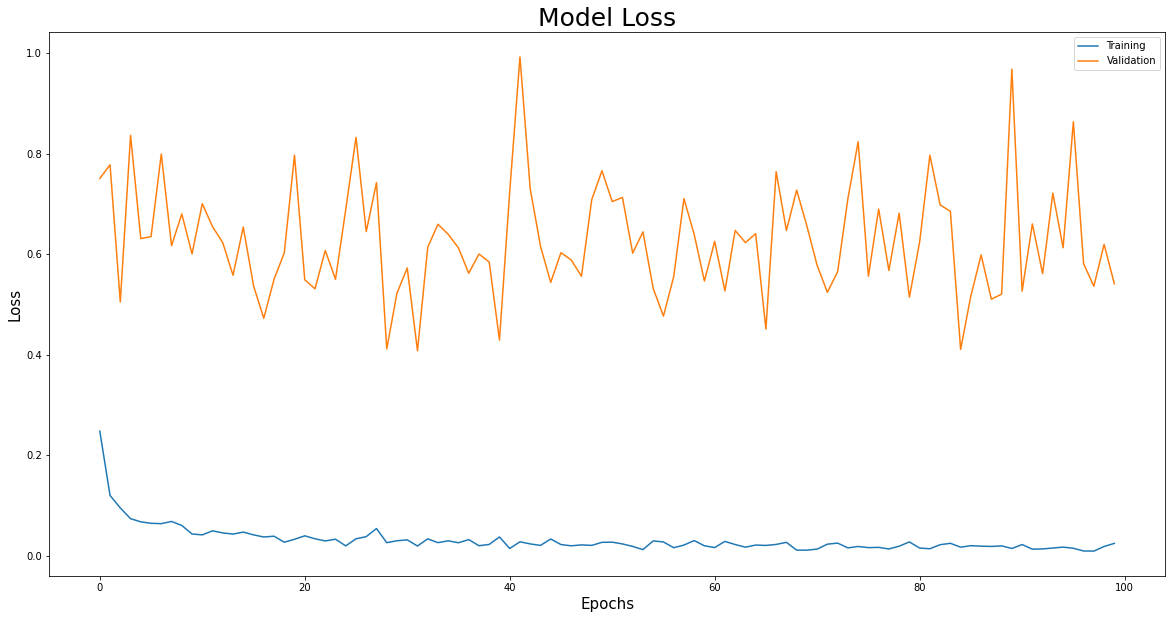

In [25]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25)
plt.ylabel('Loss', size=15)
plt.xlabel('Epochs', size=15)
plt.legend(['Training', 'Validation'], loc='bottom right')

63/63 - 0s - loss: 1.4597 - accuracy: 0.7414 - 236ms/epoch - 4ms/step
63/63 [==============================] - 1s 3ms/step


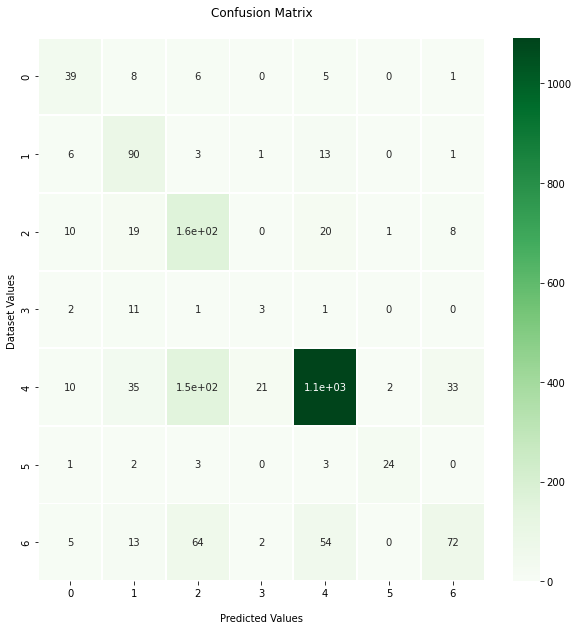

In [26]:
loss, acc = LSTM_model.evaluate(x_test_3d, y_test_3d, verbose=2)

# Prediction of the LSTM_model Prediction.
y_pred = LSTM_model.predict(x_test_3d)
y_pred = np.argmax(y_pred, axis=1)

# Computation of the actual Confusion Matrix.
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(conf_mat, annot=True, cmap='Greens', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Dataset Values ');
ax.xaxis.set_ticklabels(labels_numbers)
ax.yaxis.set_ticklabels(labels_numbers)
plt.show()

## **8.4 - TEST EXAMPLE**

We can finally check also here the Test-Image and see that the Network is guessing in the right way the disease.

In [40]:
test_image=PIL.Image.open('drive/MyDrive/SkinMeProject/test_imgs/federica.jpg')
test_image=test_image.resize((28,28))
test=x_test_3d[1]
test=np.array(test_image).reshape(-1,28,84)
test_result= LSTM_model.predict(test)
test_result=test_result.tolist()
max_prob=max(test_result[0])
test_index=test_result[0].index(max_prob)
print(classes[test_index])

1/1 [==============================] - 0s 32ms/step
('mel', 'melanoma')
